In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("IT_services.csv")

In [3]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [4]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
data.shape

(7043, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
data.shape

(7043, 20)

In [11]:
data1=data[data.TotalCharges!=' ']

In [12]:
data1.shape

(7032, 20)

In [13]:
# Convert Total Charge to float
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

# Visualization

In [15]:
data2= data1
data2['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [16]:
# filter the dataset to include only churned customers
# count the number of churned customers by gender
churn_counts = data2['Churn'].value_counts()

fig = px.bar(x=churn_counts.index, y=churn_counts.values, color=churn_counts.index,
             color_discrete_sequence=["rgb(141,228,211)", "rgb(11,82,46)"])
fig.update_layout(title='Count of Churned and Non-Churned Customers',
                  xaxis_title='Churn',
                  yaxis_title='Count',
                  width=800,
                  height=400,
                  showlegend=False)
fig.show()

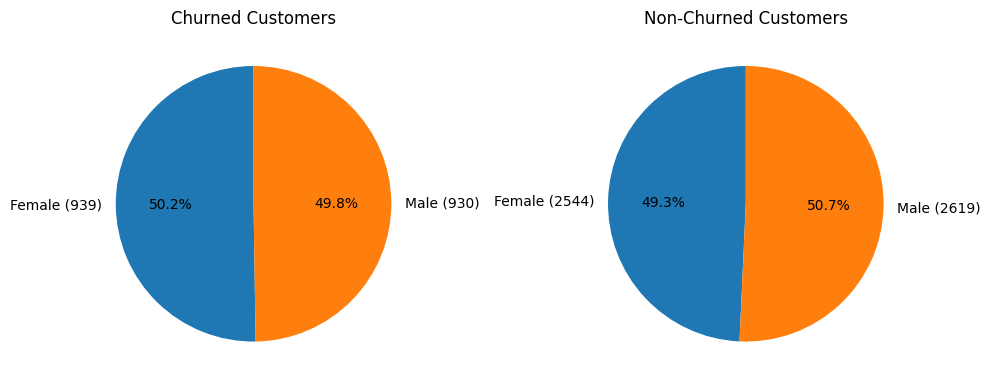

In [17]:
churn_by_gender = data2.groupby(['gender', 'Churn']).size().reset_index(name='Count')

# create separate dataframe for churned and non-churned customers
churned_df = churn_by_gender[churn_by_gender['Churn'] == 'Yes']
non_churned_df = churn_by_gender[churn_by_gender['Churn'] == 'No']

# create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for churned customers
churned_values = churned_df['Count']
churned_labels = churned_df['gender'] + ' (' + churned_values.astype(str) + ')'
axes[0].pie(churned_values, labels=churned_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Churned Customers')

# Pie chart for non-churned customers
non_churned_values = non_churned_df['Count']
non_churned_labels = non_churned_df['gender'] + ' (' + non_churned_values.astype(str) + ')'
axes[1].pie(non_churned_values, labels=non_churned_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Non-Churned Customers')

fig.tight_layout()

In [18]:
# the count of churned and non-churned customers by contract type
contract_counts = data2.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
# contract_counts
fig = px.bar(contract_counts, x='Contract', y='Count', color='Churn',
             title='Percentage of Churned and Non-Churned Customers by Contract Type',
             color_discrete_sequence=["rgb(120,185,143)", "rgb(45,81,146)", "rgb(145,202,50)"])
fig.update_layout(xaxis_title='Contract Type', yaxis_title='Count', width=800, height=400)
fig.show()

In [19]:
# group the data by tenure and churn, and calculate the count
grouped_data = data2.groupby(['tenure', 'Churn']).size().reset_index(name='Count')

fig = px.bar(grouped_data, x='tenure', y='Count', color='Churn', title='Churn Distribution by Tenure')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Count')
fig.show()

# Data Preprocessing

In [20]:
# Change Number values to Categories
# Define the number of bins (10 bins in this case)
num_bins = 10
# Calculate the bin width for MonthlyCharge
bin_width = (data2['MonthlyCharges'].max() - data2['MonthlyCharges'].min()) / num_bins
bin_edges = [data2['MonthlyCharges'].min() + i * bin_width for i in range(num_bins + 1)]# Calculate the bin edges
bins = pd.cut(data2['MonthlyCharges'], bins=bin_edges, include_lowest=True)# Create bins based on the calculated edges
data2['MonthlyCharges_cat'] = pd.cut(data2['MonthlyCharges'], bins=bin_edges, labels=False, include_lowest=True)
print(data2['MonthlyCharges_cat'].value_counts())

print('********************************************************************************')

num_bins = 10
# Calculate the bin width for Tenure
bin_width = (data2['tenure'].max() - data2['tenure'].min()) / num_bins
bin_edges = [data2['tenure'].min() + i * bin_width for i in range(num_bins + 1)]# Calculate the bin edges
bins = pd.cut(data2['tenure'], bins=bin_edges, include_lowest=True)# Create bins based on the calculated edges
data2['tenure_cat'] = pd.cut(data2['tenure'], bins=bin_edges, labels=False, include_lowest=True)
print(data2['tenure_cat'].value_counts())

MonthlyCharges_cat
0    1600
6     952
5     892
7     873
8     754
3     638
4     473
2     365
9     294
1     191
Name: count, dtype: int64
********************************************************************************
tenure_cat
0    1724
9    1109
1     735
2     561
3     538
8     501
7     495
4     473
6     452
5     444
Name: count, dtype: int64


In [21]:
print(data2[['MonthlyCharges','MonthlyCharges_cat', 'tenure', 'tenure_cat', 'Churn']])

      MonthlyCharges  MonthlyCharges_cat  tenure  tenure_cat Churn
0              29.85                   1       1           0    No
1              56.95                   3      34           4    No
2              53.85                   3       2           0   Yes
3              42.30                   2      45           6    No
4              70.70                   5       2           0   Yes
...              ...                 ...     ...         ...   ...
7038           84.80                   6      24           3    No
7039          103.20                   8      72           9    No
7040           29.60                   1      11           1    No
7041           74.40                   5       4           0   Yes
7042          105.65                   8      66           9    No

[7032 rows x 5 columns]


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7032 non-null   object 
 1   SeniorCitizen       7032 non-null   int64  
 2   Partner             7032 non-null   object 
 3   Dependents          7032 non-null   object 
 4   tenure              7032 non-null   int64  
 5   PhoneService        7032 non-null   object 
 6   MultipleLines       7032 non-null   object 
 7   InternetService     7032 non-null   object 
 8   OnlineSecurity      7032 non-null   object 
 9   OnlineBackup        7032 non-null   object 
 10  DeviceProtection    7032 non-null   object 
 11  TechSupport         7032 non-null   object 
 12  StreamingTV         7032 non-null   object 
 13  StreamingMovies     7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  PaperlessBilling    7032 non-null   object 
 16  PaymentMeth

In [23]:
pd.options.display.max_columns=22
data2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_cat,tenure_cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3,4
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,6
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5,0
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,8,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,7,2
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,8,3
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,3,8


In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
# Replace the columns that have string to No
data1.replace('No internet service','No',inplace=True)
data1.replace('No phone service','No',inplace=True)

In [26]:
# Convert Yes and No to Binary code
logical_columns = ['Partner','Dependents','PhoneService','MultipleLines',
                  'OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                  'Churn']
for col in logical_columns:
    data1[col].replace({'Yes': 1,'No': 0},inplace=True)

# Conver gender to 0 and 1
data1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
MonthlyCharges_cat: [1 3 2 5 8 7 0 9 4 6]
tenure_cat: [0 4 6 2 1 3 8 9 7 5]


In [28]:
data3 = data2.groupby(['tenure_cat','MonthlyCharges_cat']).agg({'Churn': ['sum']})
data3.columns = [f'{agg_func}_{column}' for column, agg_func in data3.columns]
data3= data3.reset_index()
print(data3.head())
data3['tenure_cat'] = data3['tenure_cat'].fillna(method='ffill')

   tenure_cat  MonthlyCharges_cat  sum_Churn
0           0                   0        115
1           0                   1         34
2           0                   2         82
3           0                   3         90
4           0                   4         16


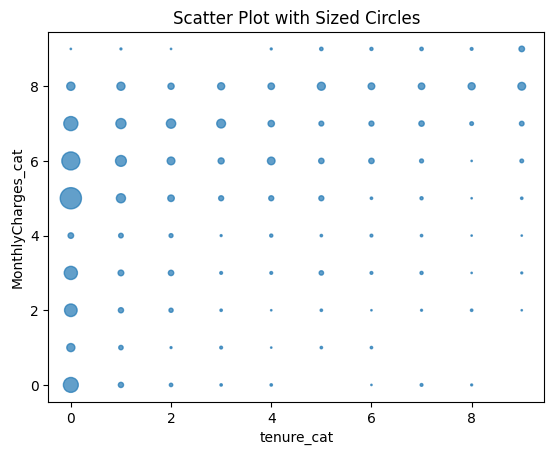

In [29]:
plt.scatter(data3['tenure_cat'], data3['MonthlyCharges_cat'], s=data3['sum_Churn'], alpha=0.7)

# Add labels and title
plt.xlabel('tenure_cat')
plt.ylabel('MonthlyCharges_cat')
plt.title('Scatter Plot with Sized Circles')

# Show the plot
plt.show()

In [30]:
data1 = pd.get_dummies(data=data1, columns=['InternetService','Contract','PaymentMethod'])
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyCharges_cat', 'tenure_cat', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
data1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_cat,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1117,0,0,0,0,52,1,1,0,0,1,0,...,7,False,True,False,False,False,True,False,True,False,False
2191,1,1,0,0,1,1,0,0,0,0,0,...,0,False,True,False,True,False,False,False,False,True,False
2011,0,0,1,1,53,1,1,1,0,1,1,...,7,True,False,False,True,False,False,False,False,True,False
4182,1,1,0,0,29,1,1,0,0,0,1,...,3,False,True,False,True,False,False,False,False,True,False
5669,0,1,1,0,43,1,0,0,1,1,0,...,5,False,True,False,False,True,False,True,False,False,False
6371,1,0,0,0,24,1,1,0,0,0,0,...,3,False,False,True,False,False,True,False,True,False,False
4979,1,0,1,1,56,1,1,0,0,0,0,...,7,False,False,True,False,False,True,False,False,False,True
6801,1,0,1,1,19,1,1,0,0,0,1,...,2,False,True,False,False,True,False,True,False,False,False
2515,1,0,0,0,64,1,1,1,1,1,1,...,8,False,True,False,False,False,True,True,False,False,False
6831,0,0,0,0,7,1,1,0,0,0,0,...,0,False,True,False,True,False,False,False,False,True,False


In [32]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MonthlyCharges_cat                           int64
tenure_cat                                   int64
InternetService_DSL            

In [33]:
# Data Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [34]:
data1[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [35]:
data1.shape

(7032, 29)

In [36]:
# Train-Split imbalanced data
X_im = data1.drop('Churn',axis='columns')
y_im = data1.Churn.astype(np.float32)

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y_im, test_size=0.2, random_state=15, stratify=y_im)

In [37]:
print('The number of rows in train for Churn column imbalanced data\n', y_train_im.value_counts())
print('The number of rows in test for Churn column imbalanced data\n', y_test_im.value_counts())

The number of rows in train for Churn column imbalanced data
 Churn
0.0    4130
1.0    1495
Name: count, dtype: int64
The number of rows in test for Churn column imbalanced data
 Churn
0.0    1033
1.0     374
Name: count, dtype: int64


# Balancing Churn Values

In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE

# Balansing dataset
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_im, y_im)

In [40]:
# Creating X, y of train and test after balance of dataset
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=43, stratify=y_smote)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (8260, 28)
shape of y train: (8260,)
shape of x test: (2066, 28)
shape of y train: (2066,)


# Model Design

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

def create_model(model_type, X_train, y_train, weights=-1):
    if model_type == 'LR':
        if weights==-1:
          model = LogisticRegression(random_state=42)
        else:
          model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]}, random_state=42)

    elif model_type == 'XGB':
         model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.3, max_depth=6, random_state=42)

    elif model_type == 'KNN':
        model = KNeighborsClassifier(n_neighbors=2)

    elif model_type == 'SVC':
        model = SVC(random_state=42)

    elif model_type == 'RF_gini':
        model = RandomForestClassifier(random_state=42)

    elif model_type == 'RF_entropy':
        model = RandomForestClassifier(criterion='entropy', random_state=42)

    else:
        raise ValueError("Invalid model type. Please choose from LR,XGB, SVC, KNN, RF_gini, RF_entropy")
    model.fit(X_train, y_train)
    return model

# Evaluation Model Function

In [42]:

def evaluate_model(model, X_test, y_test):
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)

    class_rep = classification_report(y_test,y_pred)
    print(class_rep)

# Model Types Function

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the list of model types
model_types = ['LR','XGB', 'SVC', 'KNN', 'RF_gini', 'RF_entropy']

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print('*********************************************************************************')
print('Results for imbalanced dataset')
# Iterate over each model type using create_model Function for imbalanced dataset
for model_type in model_types:
    # Create the model
    print('Model Type:', model_type)
    model_im = create_model(model_type, X_train_im,y_train_im)
    evaluate_model(model_im, X_test_im, y_test_im)

# Iterate over each model type using create_model Function for balanced dataset
print('*********************************************************************************')
print('Resutl for Balanced dataset')

for model_type in model_types:
          # Create the model
          print('Model Type:', model_type)
          model = create_model(model_type, X_train,y_train)

          # Evaluate the model using evaluate_model Function
          evaluate_model(model, X_test, y_test)

*********************************************************************************
Results for imbalanced dataset
Model Type: LR
Accuracy 0.8052594171997157 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.60       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Model Type: XGB
Accuracy 0.7882018479033405 

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1033
         1.0       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Model Type: SVC
Accuracy 0.7953091684434968 

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.